In [76]:
import pandas as pd
import numpy as np
from scipy.stats import entropy
import math
import glob
from matplotlib import pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

In [ ]:
#read data
appended_data = []
for infile in glob.glob("Data/*.pkl"):
    data = pd.read_pickle(infile)
    appended_data.append(data)
appended_data = pd.concat(appended_data)

appended_data.to_pickle('Data/FullData.pkl')

In [13]:
df = pd.read_pickle('Data/FullData.pkl')
print(df.columns)
df.dropna(inplace=True, axis=1, how='all')

Index(['index', 'pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
     

In [22]:
df.columns

Index(['index', 'pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'zone', 'des', 'game_type', 'stand', 'p_throws',
       'home_team', 'away_team', 'type', 'hit_location', 'bb_type', 'balls',
       'strikes', 'game_year', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'on_3b',
       'on_2b', 'on_1b', 'outs_when_up', 'inning', 'inning_topbot', 'hc_x',
       'hc_y', 'fielder_2', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top',
       'sz_bot', 'hit_distance_sc', 'launch_speed', 'launch_angle',
       'effective_speed', 'release_spin_rate', 'release_extension', 'game_pk',
       'pitcher.1', 'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5',
       'fielder_6', 'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estimated_ba_using_speedangle', 'estimated_woba_using_speedangle',
       'woba_value', 'woba_denom', 'babip_value', 'iso_value',
       'launch_speed_angle', 'at_bat_

In [36]:
df.loc[(df['type'] == 'S') & (df['zone'] > 10), 'type'] = 'SB'

In [44]:
df.columns

Index(['index', 'pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'zone', 'des', 'game_type', 'stand', 'p_throws',
       'home_team', 'away_team', 'type', 'hit_location', 'bb_type', 'balls',
       'strikes', 'game_year', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'on_3b',
       'on_2b', 'on_1b', 'outs_when_up', 'inning', 'inning_topbot', 'hc_x',
       'hc_y', 'fielder_2', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top',
       'sz_bot', 'hit_distance_sc', 'launch_speed', 'launch_angle',
       'effective_speed', 'release_spin_rate', 'release_extension', 'game_pk',
       'pitcher.1', 'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5',
       'fielder_6', 'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estimated_ba_using_speedangle', 'estimated_woba_using_speedangle',
       'woba_value', 'woba_denom', 'babip_value', 'iso_value',
       'launch_speed_angle', 'at_bat_

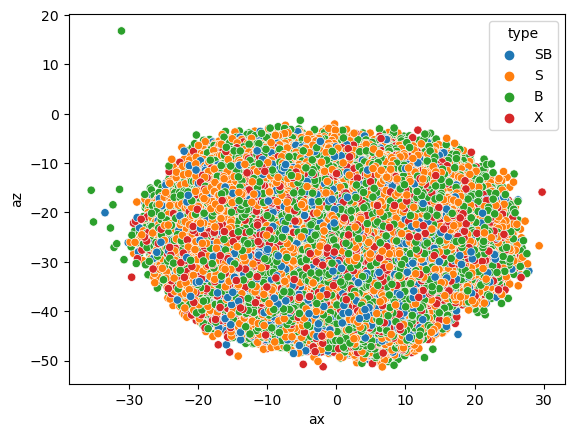

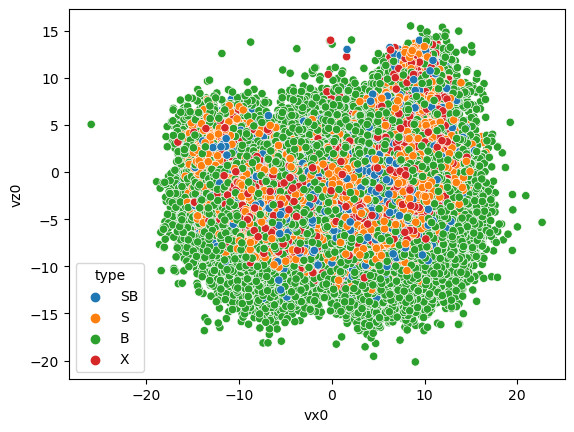

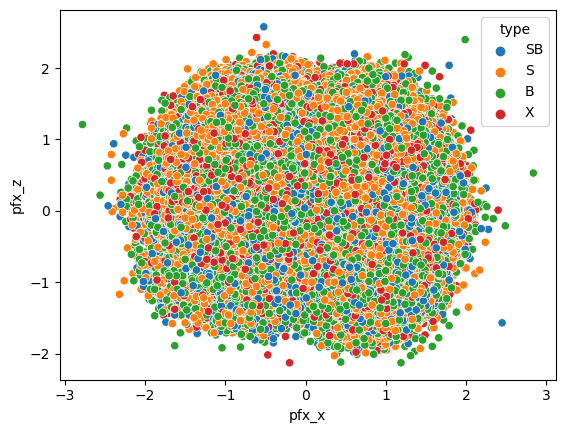

In [55]:
sns.scatterplot(x='ax', y='az', data=df, hue='type')
plt.show()
sns.scatterplot(x='vx0', y='vz0', data=df, hue='type')
plt.show()

sns.scatterplot(x='pfx_x', y='pfx_z', data=df, hue='type')
plt.show()

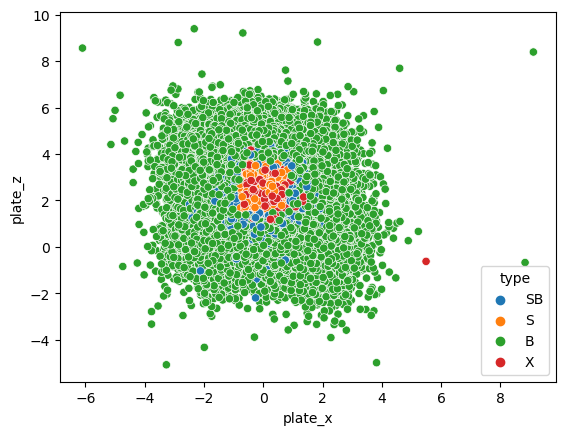

In [56]:
sns.scatterplot(x='plate_x', y='plate_z', data=df, hue='type')
plt.show()

In [70]:
df

,index,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length
0,38,SI,2021-10-31,94.4,-0.97,5.85,"Graveman, Kendall",624585.0,608665.0,strikeout,...,5.0,5.0,9.0,Infield shift,Standard,211.0,-0.001,-0.091,NaN,NaN
1,42,SI,2021-10-31,95.7,-1.06,5.85,"Graveman, Kendall",624585.0,608665.0,NaN,...,5.0,5.0,9.0,Infield shift,Standard,218.0,0.000,0.000,NaN,NaN
2,48,SI,2021-10-31,96.6,-0.89,5.90,"Graveman, Kendall",624585.0,608665.0,NaN,...,5.0,5.0,9.0,Infield shift,Standard,214.0,0.000,0.018,NaN,NaN
3,52,SI,2021-10-31,95.4,-1.02,5.88,"Graveman, Kendall",624585.0,608665.0,NaN,...,5.0,5.0,9.0,Infield shift,Standard,214.0,0.000,-0.027,NaN,NaN
4,54,SI,2021-10-31,96.0,-1.08,5.82,"Graveman, Kendall",624585.0,608665.0,NaN,...,5.0,5.0,9.0,Infield shift,Standard,216.0,0.000,-0.020,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,24628,FF,2024-05-21,93.3,2.02,6.40,"Corbin, Patrick",669304.0,571578.0,NaN,...,0.0,0.0,0.0,Standard,Standard,148.0,0.000,0.022,NaN,NaN
24996,24705,SI,2024-05-21,92.7,2.16,6.32,"Corbin, Patrick",621043.0,571578.0,triple,...,0.0,0.0,0.0,Standard,Standard,144.0,-0.026,0.185,79.759993,6.14171
24997,24717,SI,2024-05-21,94.0,2.01,6.27,"Corbin, Patrick",621043.0,571578.0,NaN,...,0.0,0.0,0.0,Standard,Standard,144.0,0.000,-0.016,NaN,NaN
24998,24875,SL,2024-05-21,80.3,2.21,6.34,"Corbin, Patrick",621043.0,571578.0,NaN,...,0.0,0.0,0.0,Standard,Standard,269.0,0.000,0.039,NaN,NaN


In [120]:
def calc_mi(x,y, data):
    x_mod = [data[i] for i in x]
    y_mod = [data[i] for i in y]

    contingency_table = pd.crosstab(x_mod, y_mod)
    ce_table = contingency_table / np.expand_dims(contingency_table.sum(axis=1), axis=1)
    rowise_ce = np.apply_along_axis(entropy, 1, ce_table)
    marginal_prob_x = contingency_table.sum(axis=1) / contingency_table.sum().sum()
    rowise_ce = marginal_prob_x * rowise_ce
    
    ce = rowise_ce.sum()
    rowise_ce = pd.Series(rowise_ce, name = 'CE')
    ce_table = pd.concat([ce_table, rowise_ce], axis=1)
    marginal_prob_y = contingency_table.sum(axis=0) / contingency_table.sum().sum()
    e_y = entropy(marginal_prob_y)

    mi = e_y - ce
    return mi, ce_table

In [122]:
mi, ce = calc_mi(['pitch_type'], ['type'], df)


0.008730405301700106